## Droplet pair

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
plt.rcParams.update({'font.size': 10})

In [3]:
%config InlineBackend.figure_format ='retina' # Disable for the cluster

In [4]:
import traceback

### Importing the code + PyPackage in the cluster

In [5]:
############################## BEGIN CLUSTER STUFF ##############################

# Preserve environment variables
#$ -V

# Use python as shell
#$ -S /home/ajinkya/anaconda3/bin/python3

# Execute from current working directory
#$ -cwd

##############################

#file = open("/home/ajinkya/github-code/package_path.txt", "r") # Cluster version

############################## END CLUSTER STUFF ##############################

### Importing the code + PyPackage locally

In [6]:
import sys
sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/py-pde')
sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/py-droplets')
sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/py-phasesep')
sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/agent-based-emulsions')

import pde, droplets, phasesep, agent_based

######################################################################################################################

In [7]:
import os

os.system('rm *.txt *.dat *.out *.hdf5 *.png *.mov *.npy')

rm: *.dat: No such file or directory
rm: *.hdf5: No such file or directory
rm: *.png: No such file or directory
rm: *.mov: No such file or directory


256

### Set the physical parameters

In [8]:
KAPPA = 0.25

PREFACTOR_FREE_ENERGY_DENSITY = 1

# This is value of b in f = (b/2)*c*c*(1-c)*(1-c)

MOBILITY = 1

### Define the PDE and the Free Energy used

In [9]:
f = phasesep.GinzburgLandau2Components()

f.expression

'0.5 * c**2 * (1 - c)**2'

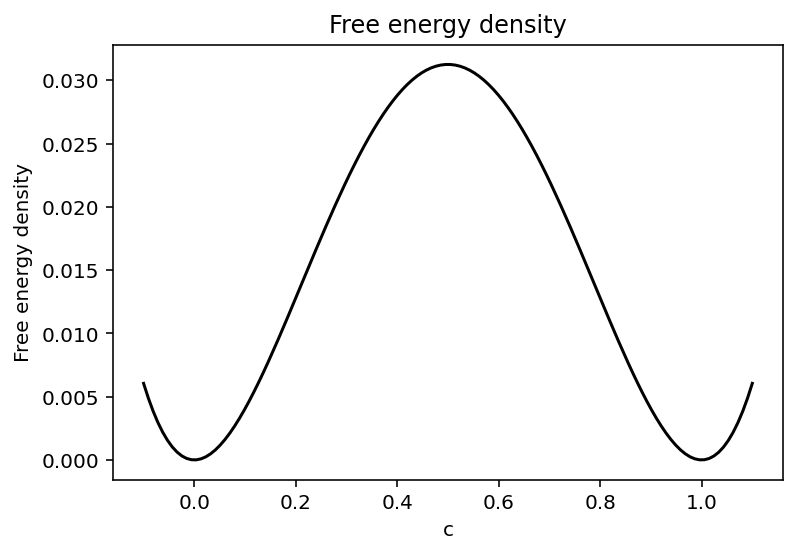

In [10]:
f.plot(extent = [-0.1, 1.1], title = 'Free energy density')

In [11]:
GAMMA = (np.sqrt(PREFACTOR_FREE_ENERGY_DENSITY * KAPPA))/6

print('GAMMA is', GAMMA)
print()

GAMMA is 0.08333333333333333



In [12]:
W = 2 * np.sqrt(KAPPA/PREFACTOR_FREE_ENERGY_DENSITY) # Analytical Interface Width

print('Interface width is', W)
print()

Interface width is 1.0



In [13]:
DIFFUSION = PREFACTOR_FREE_ENERGY_DENSITY * MOBILITY

K0 = DIFFUSION/(W**2)

print('DIFFUSION is', DIFFUSION)
print()

DIFFUSION is 1



### Define C_INF

In [14]:
C_INF = 0.05

# C_INF = 0

### Define the critical radius

In [15]:
if (C_INF > 0):
    
    R_critical_theory = 2*GAMMA/C_INF

    print('Critical_radius is ', R_critical_theory)

    print()
    
else:
    
    print('No C_INF found')

    print()

Critical_radius is  3.333333333333333



## Calculate sizes of domains

In [16]:
################ DEFINE THE GRID for Agent Based Model Simulations ################

AGM_box_length = int(1200)

In [17]:
print('Size bounds for Agent Based simulations are 0,', AGM_box_length)
print()

Size bounds for Agent Based simulations are 0, 1200



In [18]:
################ DEFINE THE GRID for Cahn Hilliard Simulations ################

limit_z = int(((AGM_box_length**3)/(np.pi))**(1/3))

limit_r = limit_z

In [19]:
print('Radial box bounds for Cahn-Hilliard simulations are 0,', limit_r)
print()
print('Height box bounds for Cahn-Hilliard simulations are 0,', limit_z)
print()

Radial box bounds for Cahn-Hilliard simulations are 0, 819

Height box bounds for Cahn-Hilliard simulations are 0, 819



In [20]:
volume_diff = 100*abs((AGM_box_length**3 - (np.pi * limit_z * limit_r * limit_r))/AGM_box_length**3)

print('volume_diff is', volume_diff, '%')

print()

volume_diff is 0.12475910300862182 %



### Make a droplet pair

In [21]:
initial_radius = 20 * W

print('Initial_radius is', initial_radius)

print()

Initial_radius is 20.0



In [22]:
initial_radius_list_CH = [initial_radius, initial_radius]

In [23]:
np.save('initial_radius_list_CH.npy', initial_radius_list_CH)

In [24]:
# Check that initial_radius is more than ~2*R_critical_theory, so as to not worry about shrinkage

if (C_INF > 0):
    
    if (initial_radius < 2*R_critical_theory):

        raise ValueError()

### Separation distance between the droplet pair

In [25]:
initial_separation = 10 * initial_radius

print('Initial_separation is', initial_separation)

print()

Initial_separation is 200.0



In [26]:
np.save('initial_separation.npy', initial_separation)

### Write out the files

In [27]:
file = open("limit_r.out", "w")
file.write(str(limit_r))
file.close()

file = open("limit_z.out", "w")
file.write(str(limit_z))
file.close()

################################################################################################################

file = open("AGM_box_length.out", "w")
file.write(str(AGM_box_length))
file.close()

In [28]:
file = open("KAPPA.out", "w")
file.write(str(KAPPA))
file.close() 

file = open("GAMMA.out", "w")
file.write(str(GAMMA))
file.close() 

file = open("INTERFACE_WIDTH.out", "w")
file.write(str(W))
file.close() 

######################################################################################################################

file = open("PREFACTOR_FREE_ENERGY_DENSITY.out", "w")
file.write(str(PREFACTOR_FREE_ENERGY_DENSITY))
file.close() 

file = open("MOBILITY.out", "w")
file.write(str(MOBILITY))
file.close()

In [29]:
file = open("C_INF.out", "w")
file.write(str(C_INF))
file.close()

if (C_INF > 0):
    
    file = open("R_critical_theory.out", "w")
    file.write(str(R_critical_theory))
    file.close()

In [30]:
################################################################################################################

## Make a MEGA file containing INFO

In [31]:
text_file = open("GENERAL_INFO.txt", "w")

################################################################################################################

text_file.write("CH_limit_r is 0 to %f \n" %limit_r)

text_file.write("CH_limit_z is 0 to %f \n" %limit_z)

text_file.write("\nAGM_box_length is 0 to %f \n" %AGM_box_length)

################################################################################################################

text_file.write("\nKAPPA is %f \n" %KAPPA)

text_file.write("PREFACTOR_FREE_ENERGY_DENSITY is %f \n" %PREFACTOR_FREE_ENERGY_DENSITY)

text_file.write("MOBILITY is %f \n" %MOBILITY)

################################################################################################################

text_file.write("\nGAMMA is %f \n" %GAMMA)

text_file.write("\nInterface Width is %f \n" %W)

################################################################################################################

text_file.write("\nInitial Radius is %f \n" %initial_radius)

text_file.write("\nInitial Seperation is %f \n" %initial_separation)

################################################################################################################

text_file.close()

################################################################################################################